In [1]:
import numpy as np
from scipy.special import iv
import timeit
import viscid 
import imp
from scipy.linalg import eig
import matplotlib.pyplot as plt

In [2]:
#If you edit viscid while the kernel is running, run this to reload the package
imp.reload(viscid)

<module 'viscid' from '/home/zack/Desktop/faraday/viscid.py'>

In [3]:
args=viscid.args

In [5]:
args.freq

4

### Dispersion relation for the inviscid problem in Sec. III. The notes Sec. IV describe continuation to the viscid problem starting from the inviscid dispersion, but I haven't been able to do that yet. Instead, below, I continue starting from the instability boundary described in Sec. V, starting with a flat substrate and changing As and ad in turn.

In [6]:
num=50

start=timeit.default_timer()
kxs1=np.arange(1,num+1)/num*args.k1x/2
kys1=np.arange(1,num+1)/num*0

evalssweep1=[]
for i in range(num):
    args.kx=kxs1[i]
    args.ky=kys1[i]
    F,G=viscid.inviscid_mat(args)
    Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep1=evalssweep1+[evals]
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs2=args.k1x/2+np.arange(1,num)/num*((2*args.k1x + args.k2x)/3 - args.k1x/2)
kys2=args.k1y/2+np.arange(1,num)/num*((2*args.k1y + args.k2y)/3 - args.k1y/2)
evalssweep2=[]
for i in range(num-1):
    args.kx=kxs2[i]
    args.ky=kys2[i]
    F,G=viscid.inviscid_mat(args)
    Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep2=evalssweep2+[evals]
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs3=np.arange(1,num)/num*((2*args.k1x + args.k2x)/3)
kys3=np.arange(1,num)/num*((2*args.k1y + args.k2y)/3)
evalssweep3=[]
for i in range(num-1):
    args.kx=kxs3[i]
    args.ky=kys3[i]
    F,G=viscid.inviscid_mat(args)
    Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep3=evalssweep3+[evals]
stop=timeit.default_timer()
print(stop-start)

1.3168450749999465
1.2250035900001421
1.0082248869998693


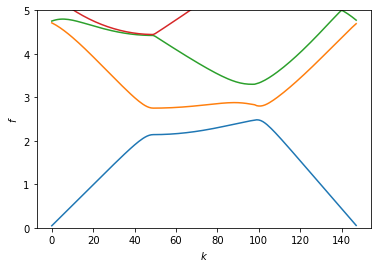

In [7]:
vals1=np.sort(np.abs(np.imag(np.array(evalssweep1)**0.5/(2*np.pi))),axis=1)
vals2=np.sort(np.abs(np.imag(np.array(evalssweep2)**0.5/(2*np.pi))),axis=1)
vals3=np.flip(np.sort(np.abs(np.imag(np.array(evalssweep3)**0.5/(2*np.pi))),axis=1),axis=0)

plt.ylim(0,5)
plt.plot(np.concatenate([vals1,vals2,vals3]))
plt.xlabel('$k$')
plt.ylabel('$f$')           
plt.show()

0.038946321000139505


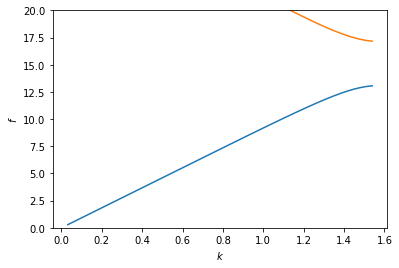

In [8]:
num=50

start=timeit.default_timer()
ks=np.arange(1,num)/num*args.k1x/2
evalssweep1=[]
args.dim=1
args.As=0.05
for k in ks:
    args.kx=k
    F,G=viscid.inviscid_mat(args)
    Fflattened=F[0,0]
    Gflattened=G[0,0]
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep1=evalssweep1+[evals]
stop=timeit.default_timer()
print(stop-start)
vals1=np.sort(np.abs(np.imag(np.array(evalssweep1)**0.5)),axis=1)

plt.ylim(0,20)
plt.plot(ks,vals1)
plt.xlabel('$k$')
plt.ylabel('$f$')           
plt.show()

In [413]:
args.dim=1
args.freq=4
args.kx=1.4
args.ky=0
args.ad=0
args.mu=1e-3


F,G=viscid.inviscid_mat(args)
Fflattened=F[0,0]
Gflattened=G[0,0]

evals,levecs,revecs=eig(Fflattened,Gflattened,left=True)
order=np.argsort(-evals)
ind=order[1]
omega_inviscid=(-evals[ind])**0.5
print(omega_inviscid)
v0_inviscid=revecs[:,ind]
w0_inviscid=np.conjugate(levecs[:,ind])

v=np.zeros((2,(2*args.Nt+1),(2*args.Nx+1)),dtype=np.complex128)
w=np.zeros((2,(2*args.Nt+1),(2*args.Nx+1)),dtype=np.complex128)
v[1,args.Nt]=v0_inviscid
w[1,args.Nt]=w0_inviscid

E=viscid.viscid_mat(omega_inviscid,args)
dE=(viscid.viscid_mat(omega_inviscid+args.domega_fd,args)-E)/args.domega_fd
print(np.einsum("kKmMnN,kmn,KMN",E,w,v)/np.einsum("kKmMnN,kmn,KMN",dE,w,v))
print(np.einsum("mM,m,M",F[0,0]-evals[ind]*G[0,0],w0_inviscid,v0_inviscid)/np.einsum("mM,m,M",G[0,0],w0_inviscid,v0_inviscid))

(17.77508304679354+0j)
(4.112275436127106-0.002425982649684495j)
(8.746997743943299e-13+0j)


In [414]:
print(np.einsum("kKmMnN,kmn,KMN",E,w,v))
print(np.einsum("kKmMnN,kmn,KMN",dE,w,v))

(-0.0045842165778610285-6.713162197807272j)
(-0.00015171038108916033-1.6324690965195667j)


In [415]:
imp.reload(viscid)
omegas,vs,ws=viscid.rayleigh(omega_inviscid,v,w,args)

In [416]:
omegas

[(13.662807610666434+0.002425982649684495j),
 (16.927029771901644+0.448687750089933j),
 (17.133134322486832+0.5776390672281944j),
 (17.31402250490048+0.4991484254627206j),
 (17.315112230151023+0.49849541447075624j),
 (17.31511032382798+0.4984960433981297j),
 (17.31511032860262+0.4984960418311711j),
 (17.31511032859064+0.49849604183509116j),
 (17.315110328590816+0.4984960418353103j),
 (17.3151103285907+0.4984960418356702j),
 (17.315110328589867+0.49849604183502766j),
 (17.3151103285909+0.49849604183553425j),
 (17.315110328590553+0.498496041835587j),
 (17.315110328590702+0.4984960418350191j),
 (17.31511032859064+0.49849604183497687j),
 (17.315110328591082+0.498496041835365j),
 (17.315110328590233+0.4984960418356962j),
 (17.315110328590706+0.49849604183551827j),
 (17.315110328590638+0.498496041835156j),
 (17.31511032859088+0.4984960418348603j)]

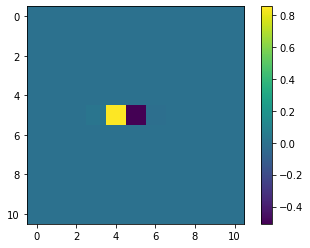

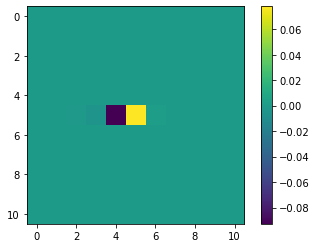

In [417]:
plt.imshow(np.real(vs[-1][1,:,:]))
plt.colorbar()
plt.show()
plt.imshow(np.imag(vs[-1][1,:,:]))
plt.colorbar()
plt.show()


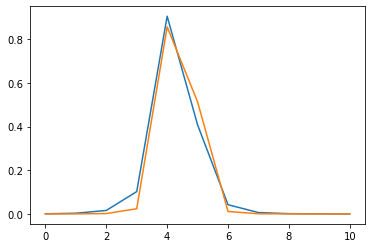

In [424]:
plt.plot(-levecs[:,order[1]])

plt.plot(np.abs(vs[-1][1,args.Nt,:]))


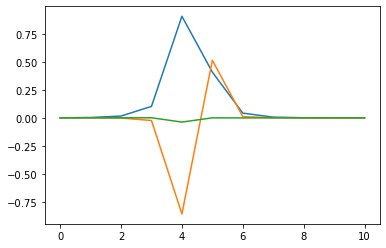

In [419]:
plt.plot(-levecs[:,order[1]])
plt.plot(np.real(vs[-1][1,args.Nt,:]/np.exp(1j*np.angle(vs[-1][1,args.Nt,args.Nx]))))
plt.plot(np.imag(vs[-1][1,args.Nt,:]/np.exp(1j*np.angle(vs[-1][1,args.Nt,args.Nx]))))

### Viscid instability boundary for flat substrate

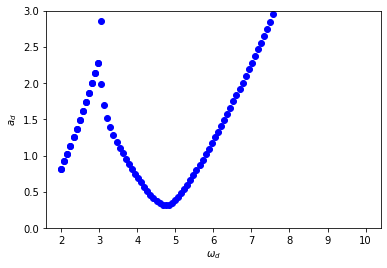

In [8]:
args.kx=0
args.ky=args.k2y/2
omega=2*np.pi*args.freq/2

evalssweep=[]
omegas=np.linspace(2*np.pi*2, 2*np.pi*10, 100)
for omega in omegas:
    viscid.args.freq=omega/(2*np.pi)
    Ftilde_0,Gtilde_0=viscid.viscid_flat_boundary(omega/2,args)
    Ftildeflattened_0=np.transpose(Ftilde_0,(0,2,1,3)).reshape((3*(2*args.Nt+1),3*(2*args.Nt+1)))
    Gtildeflattened_0=np.transpose(Gtilde_0,(0,2,1,3)).reshape((3*(2*args.Nt+1),3*(2*args.Nt+1)))
    evals,levecs,revecs=eig(Ftildeflattened_0,Gtildeflattened_0,left=True)
    evalssweep=evalssweep+[evals]
viscid.args.freq=2*(q*np.tanh(q*args.h0)*(args.g+args.sigma*q**2))**0.5/(2*np.pi)
plt.plot(omegas/(2*np.pi),np.real(evalssweep)/args.g,'bo')
plt.ylim(0,3)
plt.xlabel(r'$\omega_d$')
plt.ylabel('$a_d$')
plt.show()


### Continue the flat viscid instability boundary to the sinusoidal viscid instability boundary, As=0 to As=0.05

In [9]:
from scipy.linalg import solve
from scipy.linalg import LinAlgWarning
import warnings
warnings.filterwarnings("error",category=LinAlgWarning)

start=timeit.default_timer()
viscid.args.freq=2*(q*np.tanh(q*args.h0)*(args.g+args.sigma*q**2))**0.5/(2*np.pi)

omega=2*np.pi*viscid.args.freq/2
Ftilde_0,Gtilde_0=viscid.viscid_flat_mat(omega,qx,qy)
Ftildeflattened_0=np.transpose(Ftilde_0,(0,2,1,3)).reshape((3*(2*args.Nt+1),3*(2*args.Nt+1)))
Gtildeflattened_0=np.transpose(Gtilde_0,(0,2,1,3)).reshape((3*(2*args.Nt+1),3*(2*args.Nt+1)))
evals,levecs,revecs=eig(Ftildeflattened_0,Gtildeflattened_0,left=True)
v0=revecs[:,~np.isinf(evals)][:,-1].reshape((3,(2*args.Nt+1)))
w0=np.conjugate(levecs[:,~np.isinf(evals)][:,-1].reshape((3,(2*args.Nt+1))))
e1=np.linalg.norm(np.einsum("kKlL,KL",Ftilde_0,v0)-evals[~np.isinf(evals)][-1]*np.einsum("kKlL,KL",Gtilde_0,v0))
e2=np.linalg.norm(np.einsum("kKlL,kl",Ftilde_0,w0)-evals[~np.isinf(evals)][-1]*np.einsum("kKlL,kl",Gtilde_0,w0))
print(e1,e2,(np.einsum("kKlL,KL,kl",Ftilde_0,v0,w0)/np.einsum("kKlL,KL,kl",Gtilde_0,v0,w0)))

Ftilde,Gtilde=viscid.viscid_mat2(omega,qx,qy)

v=np.zeros((3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1)),dtype=np.complex128)
w=np.zeros((3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1)),dtype=np.complex128)
v[:,:,args.Nx,args.Ny]=v0
w[:,:,args.Nx,args.Ny]=w0

for i in range(10):
    lam=(np.einsum("kKlLmMnN,KLMN,klmn",Ftilde,v,w)/np.einsum("kKlLmMnN,KLMN,klmn",Gtilde,v,w))
    flat=np.transpose(lam*Gtilde-Ftilde,(0,2,4,6,1,3,5,7)).reshape((3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1),3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1)))
    try:
        xi=solve(flat, np.einsum("kKlLmMnN,KLMN",Gtilde,v).reshape(3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1))).reshape(3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1))
        zeta=solve(flat.T, np.einsum("kKlLmMnN,klmn",Gtilde,w).reshape(3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1))).reshape(3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1))
        v=xi/np.linalg.norm(xi)
        w=zeta/np.linalg.norm(zeta)
    except LinAlgWarning:
        print('convergence')
        lam=(np.einsum("kKlLmMnN,KLMN,klmn",Ftilde,v,w)/np.einsum("kKlLmMnN,KLMN,klmn",Gtilde,v,w))
        e1=np.linalg.norm(np.einsum("kKlLmMnN,KLMN",Ftilde,v)-lam*np.einsum("kKlLmMnN,KLMN",Gtilde,v))
        e2=np.linalg.norm(np.einsum("kKlLmMnN,klmn",Ftilde,w)-lam*np.einsum("kKlLmMnN,klmn",Gtilde,w))
        print(e1,e2,lam,flush=True)
        break

    e1=np.linalg.norm(np.einsum("kKlLmMnN,KLMN",Ftilde,v)-lam*np.einsum("kKlLmMnN,KLMN",Gtilde,v))
    e2=np.linalg.norm(np.einsum("kKlLmMnN,klmn",Ftilde,w)-lam*np.einsum("kKlLmMnN,klmn",Gtilde,w))
    print(e1,e2,lam,flush=True)
stop=timeit.default_timer()
print(stop-start)

4.444532364360808e-14 5.610044483985782e-16 (407.77882050082826-2.065274783480644e-14j)
0.8500876918116247 0.008705073926304017 (407.7788205008283-1.563342137980205e-12j)
0.05652196426419497 0.0007419699138940009 (337.49169841891364+3.389680553544659e-10j)
6.639346753407486e-06 8.758350655118355e-08 (330.37004669745176-2.4192660172893576e-11j)
convergence
6.526256816739376e-09 1.3631939313809846e-10 (330.3692042645837-2.7053169490052313e-11j)
15.962798679


### Continue the instability boundary mode to the undriven mode, ad=330 to ad=0

In [10]:
start=timeit.default_timer()
domega_fd=0.1

viscid.args.ad=np.real(lam)
dad=-np.real(lam)/10

E0=viscid.viscid_mat(omega,qx,qy)
print(np.einsum("kKlLmMnN,KLMN,klmn",E0,v,w))

vn=v
wn=w

itmax=100
omegas=[]
ads=[]
vns=[]
wns=[]
while viscid.args.ad/np.real(lam)>0:
    viscid.args.ad += dad
    for i in range(itmax):
        E_new=viscid.viscid_mat(omega,qx,qy)
        print(omega, np.einsum("kKlLmMnN,KLMN,klmn",E_new,vn,wn))
        dE=(viscid.viscid_mat(omega+domega_fd,qx,qy)-E_new)/domega_fd
        flat=np.transpose(E_new,(0,2,4,6,1,3,5,7)).reshape((3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1),3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1)))
        dflat=np.transpose(dE,(0,2,4,6,1,3,5,7)).reshape((3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1),3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1)))
        try:
            xi=solve(flat, np.einsum("kKlLmMnN,KLMN",dE,vn).reshape(3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1))).reshape(3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1))
            zeta=solve(flat.T, np.einsum("kKlLmMnN,klmn",dE,wn).reshape(3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1))).reshape(3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1))
            domega=-np.einsum("kKlLmMnN,KLMN,klmn",E_new,vn,wn)/np.einsum("kKlLmMnN,KLMN,klmn",dE,vn,wn)
            omega=omega+domega
            vn=xi/np.linalg.norm(xi)
            wn=zeta/np.linalg.norm(zeta)
        except LinAlgWarning:
            print('convergence')
            domega=-np.einsum("kKlLmMnN,KLMN,klmn",E_new,vn,wn)/np.einsum("kKlLmMnN,KLMN,klmn",dE,vn,wn)
            omega=omega+domega
            omegas=omegas+[omega]
            ads=ads+[viscid.args.ad]
            vns=vns+[vn]
            wns=wns+[wn]
            print(viscid.args.ad,i,omega, np.einsum("kKlLmMnN,KLMN,klmn",E_new,vn,wn))
            break

stop=timeit.default_timer()
print(stop-start)

(-5.402075050290822e-18-2.3253965669697706e-16j)
15.871765605769195 (0.0002846642277922215-1.4508557545652755e-12j)
(15.871877480119212+0.13324434269642263j) (-2.2947922018868736e-06-2.4428870668828594e-07j)
(15.871767816292024+0.13430312954709042j) (9.86377948562846e-09+2.8305672066908386e-09j)
(15.87176561018604+0.13430732353899957j) (-6.9527604740264535e-12-8.159471785794652e-12j)
convergence
297.3322838381253 3 (15.871765605766985+0.1343073213078293j) (-6.9527604740264535e-12-8.159471785794652e-12j)
(15.871765605766985+0.1343073213078293j) (-0.00011332851330538246+0.00027070143648082445j)
(15.8718997445334+0.2698455042241481j) (1.5496730724171389e-06-2.93528353466037e-06j)
(15.871769145600405+0.27136218127910505j) (-1.1422372601596814e-08+1.5330619324235028e-08j)
(15.871765615804355+0.2713702253964869j) (2.3235063598973465e-11-4.7389404703844665e-12j)
convergence
264.2953634116669 3 (15.87176560576414+0.2713702211635633j) (2.3235063598973465e-11-4.7389404703844665e-12j)
(15.8717656

#### The eigenvalue initially increasese in imaginary component (damping) before colliding with another (undetected, conjugate) mode and then increases in the real component. This is the resonance phenomena with the comlex conjugate mode, leading to the subharmonic response.

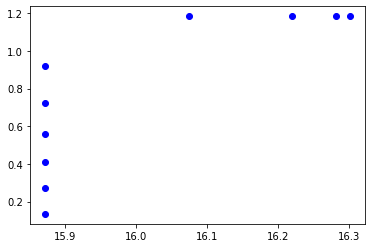

In [11]:
plt.plot(np.real(omegas),np.imag(omegas),'bo')

#### Compare the eigenvectors for the undriven viscid and inviscid solutions. They are similar, up to a complex factor.

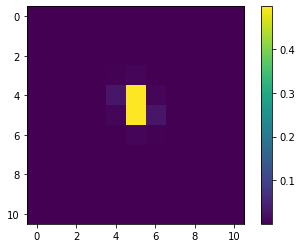

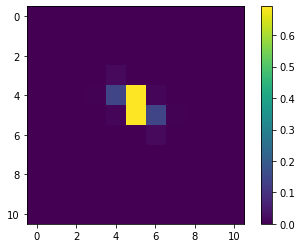

In [12]:
plt.imshow(np.abs(vns[2][2,args.Nt]).T)
plt.colorbar()
plt.show()
plt.imshow(np.abs(v0_inviscid).T)
plt.colorbar()
plt.show()

### Continue inviscid mode to the viscid one instead

In [15]:
imp.reload(viscid)

<module 'viscid' from '/Users/zack/Desktop/shaker_docs/faraday/viscid.py'>

In [14]:
from scipy.linalg import solve
from scipy.linalg import LinAlgWarning
import warnings
warnings.filterwarnings("error",category=LinAlgWarning)

viscid.args.freq=5
viscid.args.ad=0

F,G=viscid.inviscid_mat(args)
Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
evals,levecs,revecs=eig(Fflattened,Gflattened,left=True)

ind=np.argmin((-evals)**0.5)+1
print(ind,evals[ind])
v0_inviscid=revecs[:,ind].reshape(((2*args.Nx+1),(2*args.Ny+1)))
w0_inviscid=np.conjugate(levecs[:,ind].reshape(((2*args.Nx+1),(2*args.Ny+1))))
omega_inviscid=(-evals[ind])**0.5

args.mu=0.005
E=viscid.viscid_mat(omega_inviscid,args)

v=np.zeros((3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1)),dtype=np.complex128)
w=np.zeros((3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1)),dtype=np.complex128)
v[2,args.Nt]=v0_inviscid
w[2,args.Nt]=w0_inviscid
print(omega_inviscid,np.einsum("kKlLmMnN,KLMN,klmn",E,v,w))

0 0.05 0.1 1 20 0.005 980 2
63 (-298.9937927425745+0j)
(17.291436977376243+0j) (-0.049058451351176674-1.7727713506632088j)


In [18]:
start=timeit.default_timer()

domega=1e-1
omega=omega_inviscid
itmax=100
for i in range(itmax):
    E=viscid.viscid_mat(omega,args)
    dE=(viscid.viscid_mat(omega+domega,args)-E)/domega
    omega=omega-np.einsum("kKlLmMnN,KLMN,klmn",E,v,w)/np.einsum("kKlLmMnN,KLMN,klmn",dE,v,w)
    flat=np.transpose(E,(0,2,4,6,1,3,5,7)).reshape((3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1),3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1)))
    try:
        xi=solve(flat, np.einsum("kKlLmMnN,KLMN",dE,v).reshape(3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1))).reshape(3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1))
        zeta=solve(flat.T, np.einsum("kKlLmMnN,klmn",dE,w).reshape(3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1))).reshape(3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1))
        v=xi/np.linalg.norm(xi)
        w=zeta/np.linalg.norm(zeta)
    except LinAlgWarning:
        print('convergence')
        omega=omega-np.einsum("kKlLmMnN,KLMN,klmn",E,v,w)/np.einsum("kKlLmMnN,KLMN,klmn",dE,v,w)
        e1=np.linalg.norm(np.einsum("kKlLmMnN,KLMN",E,v))
        e2=np.linalg.norm(np.einsum("kKlLmMnN,klmn",E,w))
        print(e1,e2,omega,flush=True)
        break

    e1=np.linalg.norm(np.einsum("kKlLmMnN,KLMN",E,v))
    e2=np.linalg.norm(np.einsum("kKlLmMnN,klmn",E,w))
    print(e1,e2,omega,flush=True)
stop=timeit.default_timer()
print(stop-start)

4.574682658493487 0.027877988104101872 (16.323792476656177+0.028195211995869274j)
2.8553231426661094 0.020004570045683786 (15.479331930622424+1.2328436780383987j)
0.12383143167113762 0.0008596369874377643 (15.442314004083395+1.183376009675183j)
0.0012197917739877975 8.519926473412771e-06 (15.442583785694245+1.1839177456193342j)
3.539329750954373e-06 2.4722231140968734e-08 (15.442582983770482+1.1839161833044662j)
convergence
1.1385720400898464e-08 2.040963932569154e-10 (15.44258298846363+1.1839161924720165j)
32.260735679999925


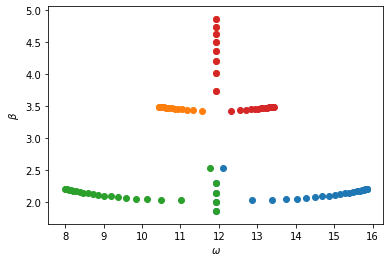

In [13]:
evals0=np.load('data/testevals_cont0.npy')
plt.scatter(np.real(evals0),np.imag(evals0))
evals1=np.load('data/testevals_cont1.npy')
plt.scatter(np.real(evals1),np.imag(evals1))
evals2=np.load('data/testevals_cont2.npy')
plt.scatter(np.real(evals2)+2*np.pi*3.8,np.imag(evals2))
evals3=np.load('data/testevals_cont3.npy')
plt.scatter(np.real(evals3)+2*np.pi*3.8,np.imag(evals3))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\beta$')
plt.savefig('continuation.pdf')
plt.show()

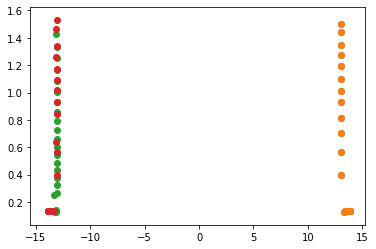

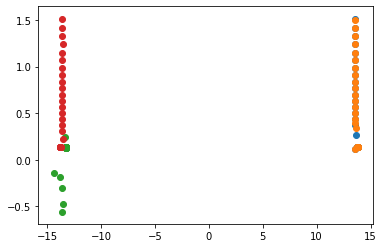

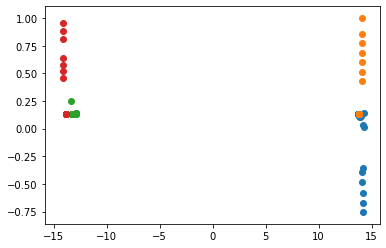

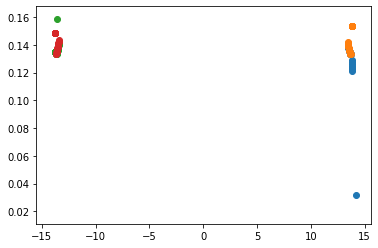

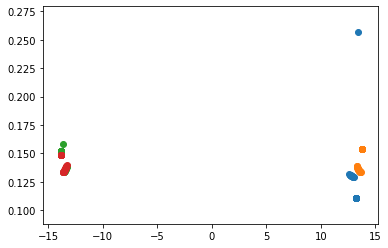

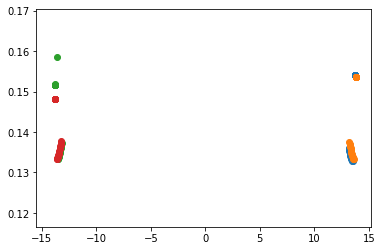

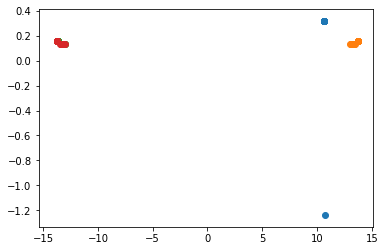

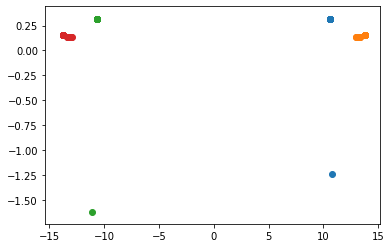

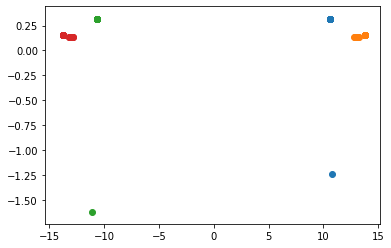

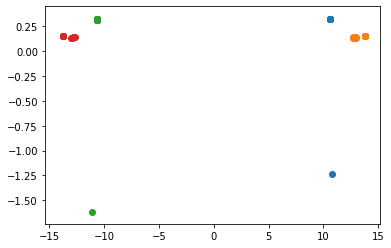

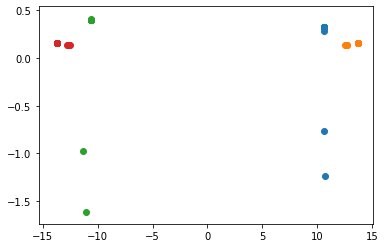

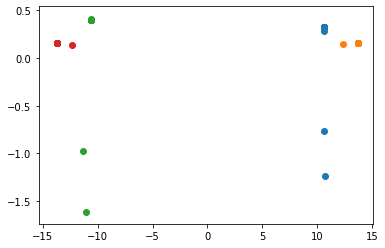

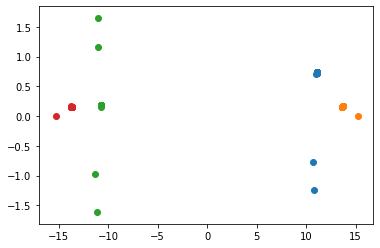

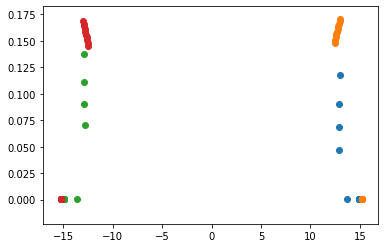

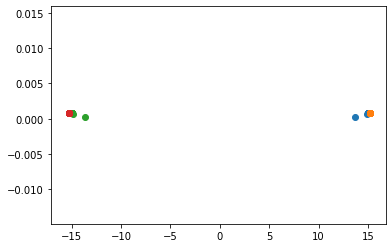

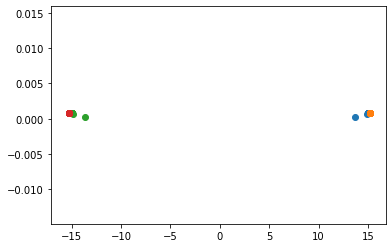

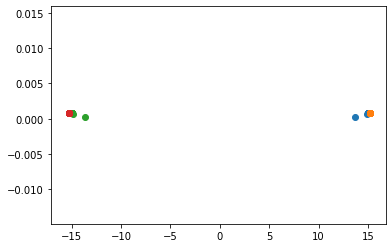

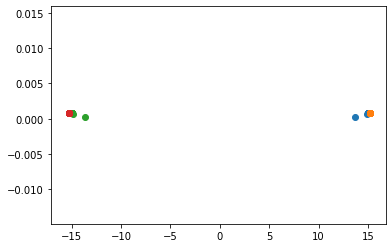

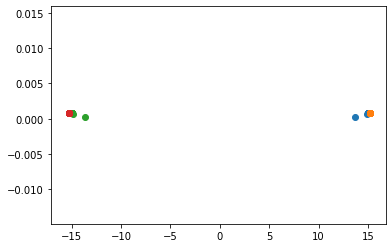

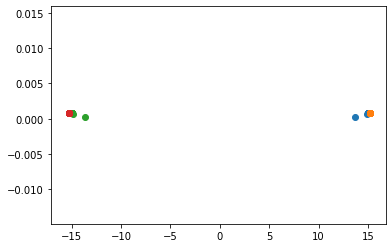

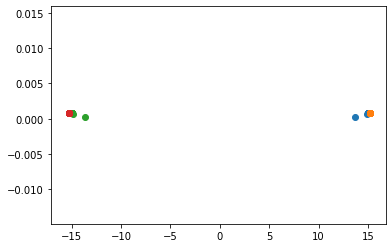

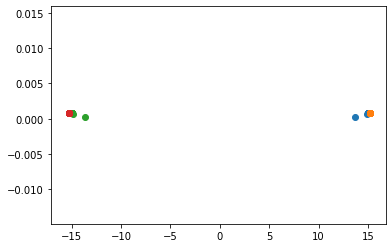

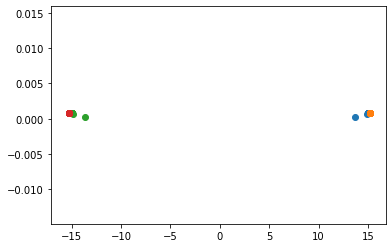

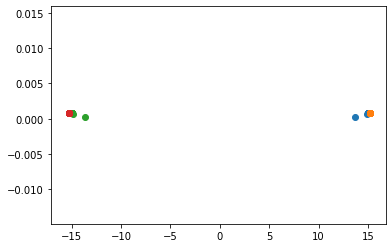

In [36]:
for i in range(1,25):
    evals0=np.load('data/test_'+str(i)+'evals_cont0.npy')
    plt.scatter(np.real(evals0),np.imag(evals0))
    evals1=np.load('data/test_'+str(i)+'evals_cont1.npy')
    plt.scatter(np.real(evals1),np.imag(evals1))
    evals2=np.load('data/test_'+str(i)+'evals_cont2.npy')
    plt.scatter(np.real(evals2),np.imag(evals2))
    evals3=np.load('data/test_'+str(i)+'evals_cont3.npy')
    plt.scatter(np.real(evals3),np.imag(evals3))
    plt.show()

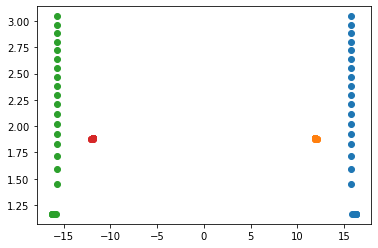

In [10]:
evals0=np.load('data/test2evals_cont0.npy')
plt.scatter(np.real(evals0),np.imag(evals0))
evals1=np.load('data/test2evals_cont1.npy')
plt.scatter(np.real(evals1),np.imag(evals1))
evals2=np.load('data/test2evals_cont2.npy')
plt.scatter(np.real(evals2),np.imag(evals2))
evals3=np.load('data/test2evals_cont3.npy')
plt.scatter(np.real(evals3),np.imag(evals3))
plt.show()